In [5]:
import numpy as np
import plotly.express as px

data = np.array([[79, 72, 75, 81, 79, 65, 75, 69, 69, 72, 71, 77, 74, 71,72, 72, 77, 69, 72, 66, 57, 73, 74, 66, 81, 83, 90, 89, 98, 97, 91, 92, 86, 80, 88, 91, 96, 96, 88, 88, 85, 83, 81, 100, 87, 88, 84, 94, 82, 89],
 [56, 62, 57, 54, 60, 62, 60, 62, 57, 58, 57, 58, 56, 51, 61, 58, 52, 62, 55, 60, 64, 61, 66, 54, 62, 77, 76, 77, 78, 80, 74, 85, 82, 72, 87, 89, 86, 79, 75, 85, 78, 86, 81, 85, 82, 84, 80, 89, 81, 82]])

data = np.transpose(data)

def k_means_clustering(data, k, max_iterations=100, tolerance=1e-4):
  # Step 1: Initialize k centroids randomly
  centroids = data[np.random.choice(data.shape[0], k, replace=False)]
  for _ in range(max_iterations):
    # Step 2 & 3: Compute Euclidean distance & Assign data points to the closest centroid
    distances = np.linalg.norm(data - centroids[:, np.newaxis], axis=2)
    assigned_clusters = np.argmin(distances, axis=0)
    # Step 4: Update centroids & Check convergence
    new_centroids = np.array([data[assigned_clusters == idx].mean(axis=0) for idx in range(k)])
    if np.linalg.norm(new_centroids - centroids) < tolerance:
      break
    centroids = new_centroids
  # Adding cluster number as a third column and append centroids
  labeled_data = np.hstack((data, assigned_clusters.reshape(-1, 1) + 1)) # Adding 1 to make cluster numbers 1-indexed
  centroids_with_label = np.hstack((centroids, np.zeros((k, 1))))
  final_data = np.vstack((labeled_data, centroids_with_label))
  return final_data

# Set the number of clusters
k = 2
# Run k-means clustering and get labeled data
labeled_data_array = k_means_clustering(data, k)
# Print the result
print(labeled_data_array)
labeled_data_array = np.hstack([labeled_data_array, 10+10*(labeled_data_array[:,2]==0).reshape(-1, 1)])
fig = px.scatter(x=labeled_data_array[:, 0], y=labeled_data_array[:, 1], color=labeled_data_array[:, 2].astype(str),
size = labeled_data_array[:, 3],
title='Clusters and Centroids', labels={'x': 'Math', 'y': 'Physics'},
color_discrete_sequence=px.colors.qualitative.Set1)
# Show plot
fig.show()


[[ 79.    56.     2.  ]
 [ 72.    62.     2.  ]
 [ 75.    57.     2.  ]
 [ 81.    54.     2.  ]
 [ 79.    60.     2.  ]
 [ 65.    62.     2.  ]
 [ 75.    60.     2.  ]
 [ 69.    62.     2.  ]
 [ 69.    57.     2.  ]
 [ 72.    58.     2.  ]
 [ 71.    57.     2.  ]
 [ 77.    58.     2.  ]
 [ 74.    56.     2.  ]
 [ 71.    51.     2.  ]
 [ 72.    61.     2.  ]
 [ 72.    58.     2.  ]
 [ 77.    52.     2.  ]
 [ 69.    62.     2.  ]
 [ 72.    55.     2.  ]
 [ 66.    60.     2.  ]
 [ 57.    64.     2.  ]
 [ 73.    61.     2.  ]
 [ 74.    66.     2.  ]
 [ 66.    54.     2.  ]
 [ 81.    62.     2.  ]
 [ 83.    77.     1.  ]
 [ 90.    76.     1.  ]
 [ 89.    77.     1.  ]
 [ 98.    78.     1.  ]
 [ 97.    80.     1.  ]
 [ 91.    74.     1.  ]
 [ 92.    85.     1.  ]
 [ 86.    82.     1.  ]
 [ 80.    72.     1.  ]
 [ 88.    87.     1.  ]
 [ 91.    89.     1.  ]
 [ 96.    86.     1.  ]
 [ 96.    79.     1.  ]
 [ 88.    75.     1.  ]
 [ 88.    85.     1.  ]
 [ 85.    78.     1.  ]
 [ 83.    86.   

In [10]:
A = np.array([[1, 1500, 3],
[1, 2000, 4],
[1, 1800, 3]])
B = np.array([300000, 400000, 330000]).reshape(-1, 1)
x = np.linalg.inv(A)@B
print(x)

A = np.array([[1, 1500, 3],
[1, 2000, 4],
[1, 1800, 3]])
B = np.array([300000, 400000, 330000]).reshape(-1, 1)
x = np.dot(np.linalg.inv(A),B)
print(x)

[[    0.]
 [  100.]
 [50000.]]
[[    0.]
 [  100.]
 [50000.]]


In [7]:
A = np.array([
[1, 1500, 3],
[1, 2000, 4],
[1, 1800, 3],
[1, 2200, 4],
[1, 1600, 3],
[1, 2400, 5],
[1, 1700, 3]])
B=np.array([
[300_000],
[400_000],
[330_000],
[440_000],
[310_000],
[480_000],
[320_000]])
D = np.linalg.inv(A.T@A)@A.T@B
D = np.linalg.pinv(A)@B
estimated_prices = A @ D
print(D,np.hstack([B,estimated_prices]),sep="\n")

[[-14400.]
 [   144.]
 [ 31200.]]
[[300000. 295200.]
 [400000. 398400.]
 [330000. 338400.]
 [440000. 427200.]
 [310000. 309600.]
 [480000. 487200.]
 [320000. 324000.]]


In [13]:
from PIL import Image
import numpy as np
# Open an image file
with Image.open('Earth.jpg') as img:
# Convert image to NumPy array
  img_array = np.array(img)
# Extract RGB channels
red_channel = img_array.copy()
red_channel[:, :, 1] = 0
red_channel[:, :, 2] = 0
green_channel = img_array.copy()
green_channel[:, :, 0] = 0
green_channel[:, :, 2] = 0
blue_channel = img_array.copy()
blue_channel[:, :, 0] = 0
blue_channel[:, :, 1] = 0
# Save each channel as a separate image
Image.fromarray(red_channel).save('earth_red_channel.jpg')
Image.fromarray(green_channel).save('earth_green_channel.jpg')
Image.fromarray(blue_channel).save('earth_blue_channel.jpg')

In [16]:
A = np.array([[4, 1], [2, 3]])
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)
# Print the results
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)
Lambda = np.diag(eigenvalues)
print(eigenvectors@Lambda@np.linalg.inv(eigenvectors))
print(eigenvectors@np.diag(1/eigenvalues)@np.linalg.inv(eigenvectors))
print(np.linalg.inv(A))

Eigenvalues: [5. 2.]
Eigenvectors: [[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]
[[4. 1.]
 [2. 3.]]
[[ 0.3 -0.1]
 [-0.2  0.4]]
[[ 0.3 -0.1]
 [-0.2  0.4]]


In [18]:
data = np.array([
[50000, 16, 28, 2, 2, 5000, 1200, 2],
[72000, 18, 35, 10, 8, 12000, 5400, 4],
[61000, 18, 36, 6, 5, 15000, 1000, 2],
[88000, 20, 35, 4, 4, 980, 1100, 4],
[91100, 18, 38, 8, 9, 20000, 0, 1],
[45100, 14, 41, 15, 14, 3900, 22000, 4],
[36200, 14, 29, 6, 5, 100, 7000, 5],
[41000, 12, 34, 9, 8, 5000, 200, 3],
[40000, 16, 32, 8, 7, 19000, 1760, 2],
[32000, 16, 30, 2, 2, 16000, 550, 1],
[29000, 16, 28, 1, 4, 2100, 4600, 2],
[21240, 12, 26, 2, 2, 100, 10010, 3],
[58700, 12, 38, 9, 9, 4500, 7800, 5],
[41000, 14, 29, 5, 4, 300, 10000, 6],
[38720, 16, 36, 11, 11, 24500, 540, 2],
[88240, 16, 38, 13, 12, 13600, 8100, 2],
[40000, 18, 39, 7, 6, 16000, 1300, 2],
[34600, 16, 40, 14, 12, 34000, 100, 3],
[29800, 12, 27, 1, 3, 100, 10000, 5],
[56400, 16, 30, 2, 1, 3000, 1200, 2],
[39800, 14, 29, 3, 2, 2500, 900, 3],
[54200, 16, 31, 5, 3, 14200, 800, 2],
[42650, 16, 27, 3, 2, 5200, 1000, 3],
[62200, 14, 40, 8, 10, 10000, 700, 2],
[72200, 16, 34, 5, 4, 12000, 400, 4],
[26530, 12, 30, 1, 2, 0, 12000, 2],
[36500, 16, 26, 2, 2, 3100, 800, 3],
[40000, 16, 29, 3, 2, 1900, 1300, 3],
[41200, 12, 34, 5, 4, 1000, 1200, 2],
[50000, 16, 35, 8, 6, 4500, 1400, 2]])

# Mean-center data
data_cent = data - np.mean(data,axis = 0)
# Calculate the covariance matrix
cov_mat = 1/(data.shape[0]-1)*data_cent.T@data_cent
D = np.diag(np.diag(cov_mat))
# Calculate the correlation matrix
cor_mat =np.sqrt(np.linalg.inv(D))@cov_mat@np.sqrt(np.linalg.inv(D))
# np.corrcoef(data_cent, rowvar = False)
np.set_printoptions(precision=2, suppress=True)
# Eigendecomposition
L, V = np.linalg.eigh(cor_mat)
# Sort eigenvalues (and corresponding vectors) descending
sorted_indices = np.argsort(L)[::-1]
L = L[sorted_indices]
V = V[:, sorted_indices]
# Ratio of each eignevalue to total
r = L/np.sum(L)
projected_data = np.dot(data_cent, V)

import plotly.express as px
import numpy as np
fig = px.bar(x=range(1,9),
y=r,
labels={'x':'Principal Component', 'y':'Explained Variance'},
title='Scree Plot')
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



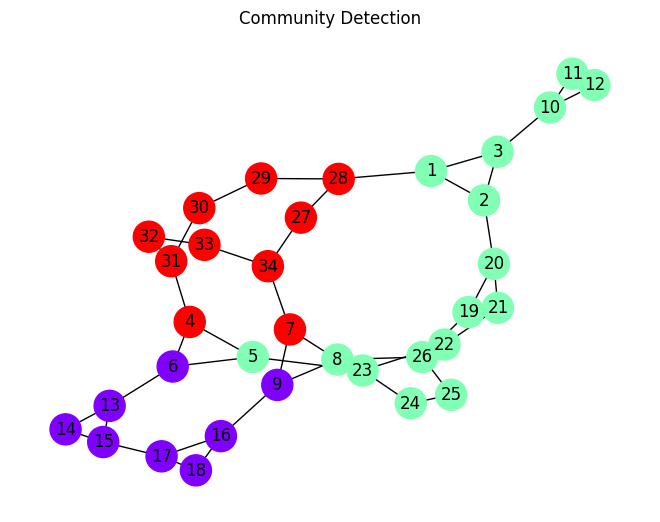

In [19]:
import networkx as nx
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Step 1: Construct the Adjacency Matrix
# Create a sample graph (you should replace this with your actual graph)
G = nx.Graph()
edges = [
(1, 2), (2, 3), (3, 1), (4, 5), (5, 6), (6, 4), (7, 8), (8, 9), (9, 7),(10, 11), (11, 12), (12, 10), (13, 14), (14, 15), (15, 13),
(16, 17), (17, 18), (18, 16), (3, 10), (6, 13), (9, 16), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25),
(25, 26), (26, 19), (2, 20), (5, 23), (8, 26), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 27),
(1, 28), (4, 31), (7, 34), (15,17) ]
G.add_edges_from(edges)
# Get the Adjacency Matrix (A)
A = nx.adjacency_matrix(G).toarray()
# Step 2: Calculate the Laplacian Matrix
# Degree matrix (D)
D = np.diag(A.sum(axis=1))
# Graph Laplacian (L)
L = D - A
# Normalized Laplacian (L_sym)
D_half_inv = np.linalg.inv(np.sqrt(D))
L_sym = np.dot(D_half_inv, np.dot(L, D_half_inv))
# Step 3: Eigendecomposition of the Laplacian
eigenvalues, eigenvectors = np.linalg.eigh(L_sym)
# Step 4: Select k eigenvectors corresponding to the k smallest non-zero eigenvalues
k = 3 # Set the number of communities you expect
selected_eigenvectors = eigenvectors[:, 1:k+1]
# Step 5: Cluster Rows using k-means
kmeans = KMeans(n_clusters=k)
kmeans.fit(selected_eigenvectors)
colors = kmeans.labels_
# Visualization (Optional)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=500, cmap=plt.cm.rainbow)
plt.title("Community Detection")
plt.show()

In [21]:
A = np.array([[1, 2],
[3, 4],
[5, 6]])
print("Original Matrix A:")
print(A)
U, Sigma, VT = np.linalg.svd(A, full_matrices=True)
print("Matrix U (Left Singular Vectors):")
print(U)
print("\nDiagonal Matrix Sigma (Singular Values):")
print(Sigma)
print("\nMatrix VT (Right Singular Vectors):")
print(VT)
# Convert Sigma to the appropriate dimensional matrix
Sigma_mat = np.zeros((A.shape[0], A.shape[1]))
for i in range(min(A.shape)):
  Sigma_mat[i, i] = Sigma[i]
# Reconstruct the original matrix
A_reconstructed = U @ Sigma_mat @ VT
print("Reconstructed Matrix A:")
print(A_reconstructed)
# Relationship with eigenvalues
L, V = np.linalg.eig(A.T@A)
print(f"Square root of eigval of A.T@A: {np.sqrt(L)}")

Original Matrix A:
[[1 2]
 [3 4]
 [5 6]]
Matrix U (Left Singular Vectors):
[[-0.23  0.88  0.41]
 [-0.52  0.24 -0.82]
 [-0.82 -0.4   0.41]]

Diagonal Matrix Sigma (Singular Values):
[9.53 0.51]

Matrix VT (Right Singular Vectors):
[[-0.62 -0.78]
 [-0.78  0.62]]
Reconstructed Matrix A:
[[1. 2.]
 [3. 4.]
 [5. 6.]]
Square root of eigval of A.T@A: [0.51 9.53]


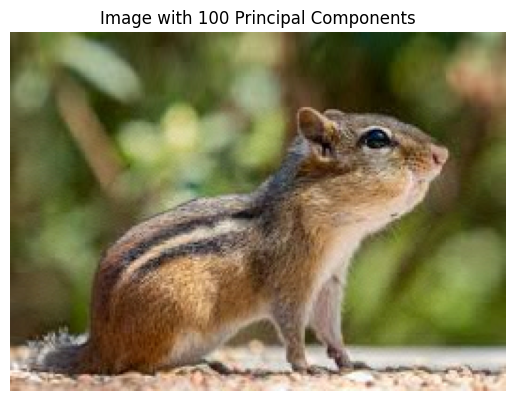

In [24]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Step 1: Read and Prepare the Image
image = Image.open(r'chipmunk.jpg') # Replace with your image path
image_array = np.array(image) / 255.0 # Convert to numpy array and normalize to [0, 1]
# Step 2: Apply SVD on Each Channel
def compress_channel(channel, k):
  U, Sigma, VT = np.linalg.svd(channel, full_matrices=False)
  U_k = U[:, :k]
  Sigma_k = np.diag(Sigma[:k])
  VT_k = VT[:k, :]
  return U_k @ Sigma_k @ VT_k

k = 100 # Number of principal components to keep
reconstructed_channels = [compress_channel(image_array[:, :, i], k) for i in range(image_array.shape[2])]
# Step 3: Reconstruct the Image
reconstructed_image = np.stack(reconstructed_channels, axis=2)
# Clip values to be in valid range [0, 1]
reconstructed_image = np.clip(reconstructed_image, 0, 1)
# Step 4: Save or Display the Compressed Image
plt.imshow(reconstructed_image)
plt.title(f'Image with {k} Principal Components')
plt.axis('off')
plt.show()
reconstructed_image_pil = Image.fromarray((reconstructed_image*255).astype(np.uint8))
output_path = r'chipmunk3.jpg'
reconstructed_image_pil.save(output_path, 'JPEG')